# Lacmus crop lassifyer

Идея
- сжать изобрадения в 2 раза
- порезать сжатый датасет на кропы размера 224*224 случайным образом
- разделить их на 2 класса - Background и Pedestrian
- сделать аугументацию изображениям
- обучить бинарный классификатор на такой выборке
- попробовать cutmix и др подходы
- сравнить разные имплентации resnet50 и др архитектур

### Шаг 1. Подготовка и анализ данных

**Загрузка LADD**

In [49]:
#import library
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import tqdm
%matplotlib inline

In [2]:
# crop data and devide it for 2 folders 
from data_utils.crop import DatasetGridCropper, ImageGridCropper
from data_utils.dataset import LaddDataset

LADD_PATH = '/files/datasets/lacmus-ds/ladd/smal_summer_winter'
LADD_CROP_BASE_PATH = '/files/datasets/lacmus-ds/ladd_crop/base'

if not os.path.isdir(LADD_CROP_BASE_PATH):
    os.mkdir(LADD_CROP_BASE_PATH)

cropper = DatasetGridCropper(
        source_dataset=LaddDataset(path=LADD_PATH),
        target_dataset=LaddDataset(path=LADD_CROP_BASE_PATH),
        image_cropper=ImageGridCropper(
            window_w=224,
            window_h=224,
            overlap_w=112,
            overlap_h=112,
            min_cropped_bbox_square=0.8
        ),
        iter_callback=tqdm.tqdm
    )

cropper.generate_dataset()

  3%|▎         | 16/489 [00:00<00:03, 154.70it/s]

Reading source dataset...
Generate fragments...


100%|██████████| 489/489 [00:09<00:00, 51.46it/s]


Filter pedestrian fragments...


  0%|          | 0/3798 [00:00<?, ?it/s]

Saving pedestrian fragments...


100%|██████████| 3798/3798 [01:15<00:00, 50.26it/s]


Filter background fragments...
Saving background fragments...


100%|██████████| 300746/300746 [1:45:00<00:00, 47.74it/s]  


In [23]:
# imagenet backgrounds
import os
import cv2
def resize(path: str, save_path: str, cr_size=224):
    crop_size=cr_size
    print(path)
    if os.path.isfile(path):
        img = cv2.imread(path)
    else:
        return False
    
    dim = (crop_size, crop_size)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
    cv2.imwrite(os.path.join(save_path, os.path.basename(path).split('.')[0] + '_pic.jpg'), img)
    return True

src_images = glob.glob('/files/datasets/lacmus-ds/imagenet_back/src/*')
src_images = list(np.random.choice(src_images, size=10000, replace=False))

for img in src_images:
    try:
        resize(img, '/files/datasets/lacmus-ds/imagenet_back/crop')
    except:
        pass

print(len(glob.glob('/files/datasets/lacmus-ds/imagenet_back/crop/*')))

/files/datasets/lacmus-ds/imagenet_back/src/test_4791.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4088.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3729.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5299.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_551.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3812.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5601.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2483.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8627.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7936.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5487.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6476.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6137.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1472.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6973.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8696.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6729.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_6334.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_117.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6194.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2625.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4850.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6325.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6125.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8468.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3141.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7902.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8949.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3646.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6942.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7351.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5804.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5788.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7621.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_4768.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6000.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4280.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6429.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4291.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4741.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7960.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4057.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1574.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3533.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2506.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_388.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6250.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4520.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5528.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9415.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9184.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_4180.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4981.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5790.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3763.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5408.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8111.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8310.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2381.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1209.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8128.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1822.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2705.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3935.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_738.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_693.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4512.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6812.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_4723.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2501.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5640.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9316.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2046.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1179.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5438.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4005.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4966.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3429.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9606.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4588.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8352.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_766.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1401.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_218.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2660.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_3174.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8413.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2307.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5684.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5878.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9447.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5215.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_137.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6558.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_121.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8966.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1061.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7205.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3788.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9937.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7361.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7289.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_9290.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6574.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4855.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3119.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3861.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_708.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8027.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2250.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8300.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5807.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7781.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2322.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3372.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8419.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9394.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7857.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4114.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_3936.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6871.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6032.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3090.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_186.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9318.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6025.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6854.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8044.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7706.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4350.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8790.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1523.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3019.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7338.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7522.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5595.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_730.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_379.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7918.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3986.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7858.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1888.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9387.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2417.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5278.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5783.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1017.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6960.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4651.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4703.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_760.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8530.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5739.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_39.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8354.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8753.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2423.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1162.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3961.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2448.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_445.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9913.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7074.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9144.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9824.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5476.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2734.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5647.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2957.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6818.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_6496.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9133.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5918.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3519.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_11.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6364.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6466.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9464.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2984.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8602.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8901.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3783.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5681.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5671.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3482.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7167.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3597.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_2477.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9070.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6086.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2623.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8373.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5978.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1556.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1488.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7233.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2926.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3364.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2913.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4007.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8778.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6181.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8176.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5459.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_649.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2801.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7851.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8161.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3653.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1904.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2331.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4008.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1976.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7759.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_187.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6367.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2073.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2502.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_724.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9609.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5635.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_7.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_182.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2987.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8465.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4386.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7983.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8789.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2604.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8839.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8245.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5211.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6789.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6743.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1613.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9269.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3931.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7370.JPEG
/

/files/datasets/lacmus-ds/imagenet_back/src/test_5131.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5048.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2364.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_228.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9293.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1661.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7877.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1465.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5630.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5244.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4805.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2271.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8226.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6597.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6629.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6791.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9694.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_2302.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3927.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_21.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2177.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9554.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5798.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6449.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7931.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1107.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3686.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3135.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4615.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4012.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8276.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5727.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9667.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3118.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_4640.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2101.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9328.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5903.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3445.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1227.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2251.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8758.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1013.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8900.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4374.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4211.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7542.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1014.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3385.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6959.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3942.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_9948.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_544.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2768.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3579.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1142.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7487.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1947.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4286.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7871.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_248.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1783.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3863.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5449.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6755.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6610.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8755.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1709.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_3187.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5885.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8828.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5413.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5889.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7717.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8793.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1906.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3094.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6022.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8158.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5776.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6062.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_971.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6592.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4424.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_198.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_6877.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8927.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9868.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5549.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9395.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7899.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7489.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3698.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4585.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9448.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1403.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4185.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4916.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5149.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_150.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7785.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6439.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_1722.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6830.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4629.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2419.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3926.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_932.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6609.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2420.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2061.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1550.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1242.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8842.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4432.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_71.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8819.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5279.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_639.JPEG
/

/files/datasets/lacmus-ds/imagenet_back/src/test_6956.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4070.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6272.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2764.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6145.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9489.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9619.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8977.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3889.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7602.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5382.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4323.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5135.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3556.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9713.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9519.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5619.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_4581.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6804.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8681.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4113.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5869.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6576.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4206.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9122.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2255.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2988.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6751.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3542.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8237.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_966.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8000.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1081.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7268.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_2345.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5563.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_230.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4590.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8265.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_636.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5524.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3875.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5626.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2445.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8652.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_630.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9890.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5412.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8962.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2539.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1786.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_7187.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1723.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4888.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2202.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_977.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4544.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1854.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2710.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8926.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2267.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6458.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1108.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1511.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3860.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9106.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7863.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3648.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_9428.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9846.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9081.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2520.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5592.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8041.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6580.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8089.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6605.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5316.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5470.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3042.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8113.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5342.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4094.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2180.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4879.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_441.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2355.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1508.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7696.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_450.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9123.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4141.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6896.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2126.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6693.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8815.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1657.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1797.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9636.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5973.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_523.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4330.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_7252.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4732.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3775.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6484.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5920.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4668.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3461.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6307.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7929.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3553.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9121.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7376.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8948.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6217.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_655.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4719.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4674.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_1268.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1680.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7144.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5940.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2618.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8286.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3285.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3682.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6495.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8410.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6123.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6882.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5018.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3441.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1968.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_471.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_697.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_7436.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9455.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5068.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1921.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6872.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8661.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8814.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9673.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9453.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_42.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9110.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8641.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7951.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7795.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5395.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2547.JPEG
/f

/files/datasets/lacmus-ds/imagenet_back/src/test_140.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6534.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5906.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2732.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8869.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3265.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8513.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6560.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7396.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1733.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8146.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_517.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3873.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7390.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6266.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1584.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4672.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_9728.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7560.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6756.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7581.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1039.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1707.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9879.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_266.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2996.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_416.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2064.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5897.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_803.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4382.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8533.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3246.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_414.JPEG
/

/files/datasets/lacmus-ds/imagenet_back/src/test_8746.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4924.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4186.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5658.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8291.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7663.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8676.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3365.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3595.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1649.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5340.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7950.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1961.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3816.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4250.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9744.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8317.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_2889.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_933.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4720.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1496.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9268.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5190.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9465.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1813.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8813.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4953.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_204.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1801.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6547.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5322.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3158.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9003.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5246.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_1429.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_139.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4967.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1754.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1900.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9382.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8723.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3610.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7798.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9237.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3359.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2031.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9768.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4775.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_581.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4370.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6824.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_82.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3722.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4835.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7523.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5104.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6169.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9130.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2434.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9787.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1184.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_362.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4112.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5637.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5802.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8923.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3583.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3852.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_6557.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2176.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9851.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_984.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8108.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_676.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2163.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8095.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4877.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5825.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5407.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6362.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1699.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1715.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2056.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6624.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2584.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_1379.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3201.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5813.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2151.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2848.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7974.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5571.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2113.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3353.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6637.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8918.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9535.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2464.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2491.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_351.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2499.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8272.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_9918.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8293.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5728.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3891.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1673.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5715.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5744.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7704.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7090.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8281.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6276.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3459.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6966.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1363.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4687.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6951.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7270.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_2881.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6511.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_68.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2365.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6442.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_893.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3502.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_596.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7898.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7996.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9915.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1843.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6310.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2890.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4866.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_277.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2022.JPEG
/f

/files/datasets/lacmus-ds/imagenet_back/src/test_4469.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4342.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6337.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9864.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6160.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6645.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4743.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3329.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7263.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4470.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9201.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3625.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_712.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7140.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3664.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8523.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6564.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_1987.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7742.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5392.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4560.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1944.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9471.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4947.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9172.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3607.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1222.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4905.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6142.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9902.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7516.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9568.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3792.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6195.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_3003.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5782.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7543.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9042.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2596.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2161.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1175.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_804.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3701.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_331.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8612.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4001.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_654.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7343.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3537.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3713.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2809.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_1646.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2868.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9911.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3654.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2439.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8163.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7348.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7586.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6394.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5942.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3228.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8267.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6438.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3444.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1034.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5743.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5368.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_6051.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6003.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4762.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5532.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6955.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4711.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2814.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9376.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5122.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3506.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5445.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5456.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9101.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1215.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6265.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8858.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2815.JP

/files/datasets/lacmus-ds/imagenet_back/src/test_8816.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2254.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2621.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9881.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1631.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_950.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5566.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9308.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2910.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1808.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5012.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8574.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3530.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1958.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5478.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9825.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7047.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_3137.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7352.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4933.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9684.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8806.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5881.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_541.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2230.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8771.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7503.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8347.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2507.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4881.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2880.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7801.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7968.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9075.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_7269.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5491.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8724.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_123.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4753.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6237.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_787.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9202.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7400.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4510.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2700.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1642.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_767.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5253.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9572.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1226.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4380.JPEG


/files/datasets/lacmus-ds/imagenet_back/src/test_5167.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4169.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_770.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9771.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5912.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9512.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8308.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3744.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1003.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9487.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7160.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7677.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5182.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2524.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9836.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9885.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_520.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_7662.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_14.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3933.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7568.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1157.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5044.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2461.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5371.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2105.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2066.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1258.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3611.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4730.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7841.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7150.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_455.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_145.JPEG
/

/files/datasets/lacmus-ds/imagenet_back/src/test_2198.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9642.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7316.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6359.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7860.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6211.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9780.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4507.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7639.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7805.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6575.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2804.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4062.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6583.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_987.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3517.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9367.JPE

/files/datasets/lacmus-ds/imagenet_back/src/test_8393.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_3815.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7727.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5093.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9859.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5639.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4175.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4274.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7883.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2824.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6996.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7477.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_681.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_876.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_6411.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_5254.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4771.JPEG

/files/datasets/lacmus-ds/imagenet_back/src/test_3626.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9791.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7206.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1922.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4143.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9016.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2425.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_9978.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2998.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4445.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7708.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1765.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_4047.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_2155.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_8548.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_1521.JPEG
/files/datasets/lacmus-ds/imagenet_back/src/test_7317.JP

10000


In [5]:
# augument data
import cv2
from pathlib import Path
import xml.etree.ElementTree as ET 
import numpy as np
import os
import random
from scipy import ndimage
import imgaug as ia
import imgaug.augmenters as iaa

ia.seed(1)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    #iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (1, 1.2), "y": (1, 1.2)}
    )
], random_order=True) # apply augmenters in random order


def transform_target_image(img, p_width, inpaint_width):
    ''' Create boolean and gradient masks for an image, then apply random transformation both for image and masks.
    Returns transformed image ind its masks.'''
    
    inpaint_width = random.randint(inpaint_width-15, inpaint_width+15)

    img_h, img_w, _ = img.shape
 
    # boolean mask of (target size)+(border size) for inpainting
    boolean_mask = np.zeros_like(img).astype('uint8')
    boolean_mask[inpaint_width:img_h-inpaint_width, inpaint_width:img_w-inpaint_width, :]=255
    
    # boolean mask of (target size) for bbox generation
    frame_h = int(np.ceil((img_h-2*inpaint_width)/(1+2*p_width)))
    frame_w = int(np.ceil((img_w-2*inpaint_width)/(1+2*p_width)))
    
    dh = int((img_h-frame_h)/2)
    dw = int((img_w-frame_w)/2)
    
    target_frame = np.zeros_like(img).astype('uint8')
    target_frame[dh:img_h-dh, dw:img_w-dw, :]=255
    
    # gradient mask for simple image mixing
    gradient_mask = np.ones_like(img).astype('float')
    
    for h in range(inpaint_width):
        for w in range(img_w):
            gradient_mask[h, w, :] = h/inpaint_width

    for h in range(img_h-inpaint_width, img_h):
        for w in range(img_w):
            gradient_mask[h, w, :] = (img_h-h)/inpaint_width
            
    for h in range(img_h):
        for w in range(inpaint_width):
            if h<inpaint_width or h>img_h-inpaint_width:               
                gradient_mask[h, w, :] = min(gradient_mask[h, w, 0], w/inpaint_width)
            else:            
                gradient_mask[h, w, :] = w/inpaint_width 
            
    for h in range(img_h):
        for w in range(img_w-inpaint_width, img_w):
            if h<inpaint_width or h>img_h-inpaint_width:
                gradient_mask[h, w, :] = min(gradient_mask[h, w, 0], (img_w-w)/inpaint_width)
            else:            
                gradient_mask[h, w, :] = (img_w-w)/inpaint_width  



    # random rotation   
    #angle = random.random()*360    
    #res_img = ndimage.rotate(img, angle)
    #boolean_mask = ndimage.rotate(boolean_mask, angle)
    #gradient_mask = ndimage.rotate(gradient_mask, angle)
    #target_frame = ndimage.rotate(target_frame, angle)

    imglist = []
    imglist.append(img)
    images_aug = seq.augment_images(imglist)
    img = images_aug[0]
        
    return img, boolean_mask, gradient_mask, target_frame



def place_img_to_background(img, back, b_mask, grad_mask, t_frame):
    ''' Place target image on background, then generate bbox corners'''
    
    # get background size    
    height = back.shape[0]
    width = back.shape[1]
    
    # get insertion point
    h0 = int(random.random()*(height-img.shape[0]))
    w0 = int(random.random()*(width-img.shape[1]))
    
    # extend target img to background size    
    targ = np.zeros_like(back)
    targ[h0:h0+img.shape[0], w0:w0+img.shape[1], :] = img

    # extend target grad_mask to background size
    g_mask = np.zeros_like(back).astype('float')
    g_mask[h0:h0+img.shape[0], w0:w0+img.shape[1], :] = grad_mask
    
    # mix images
    res_img = (targ*g_mask + back*(1-g_mask)).astype('uint8')
    
    # generate bbox
    bbox={}
    bbox['xmin'] = np.min(np.argwhere(np.sum(t_frame[:,:,0], axis=0))) + w0
    bbox['xmax'] = np.max(np.argwhere(np.sum(t_frame[:,:,0], axis=0))) + w0
    bbox['ymin'] = np.min(np.argwhere(np.sum(t_frame[:,:,0], axis=1))) + h0
    bbox['ymax'] = np.max(np.argwhere(np.sum(t_frame[:,:,0], axis=1))) + h0
        
    return res_img, bbox



def draw_bbox(image, bbox):
    '''Draws bbox on image, inputs: image and bbox as a dict'''
    
    image_h, image_w, _ = image.shape

    xmin = bbox['xmin']
    ymin = bbox['ymin']
    xmax = bbox['xmax']
    ymax = bbox['ymax']

    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0,255,0), 3)
        
    return image  

class DatasetAug:
    """Формирование нового датасета, разрезая изображения из старого"""

    # noinspection Mypy
    def __init__(self,
                 source_dataset: str,
                 target_folder: str,
                 background_folder: str,
                 p_width: int,
                 inpaint_width: int):
        self.source_dataset = source_dataset
        self.target_folder = target_folder
        self.background_folder = background_folder
        self.p_width = p_width
        self.inpaint_width = inpaint_width
    

    def generate(self):
        # open CFG file, define paths and crops shapes
        dataset_path = self.source_dataset
        backs_folder = self.background_folder
        aug_folder = self.target_folder
        p_width = float(self.p_width) / 100
        inpaint_width = self.inpaint_width

        images_folder      =         'JPEGImages'
        annotations_folder =         'Annotations'

        # Create folders for outputs    
        if not os.path.isdir(aug_folder):
            os.mkdir(aug_folder)
            os.mkdir(Path(aug_folder, 'Targets'))
            os.mkdir(Path(aug_folder, 'Pedestrian'))
            os.mkdir(Path(aug_folder, 'Background'))


        # parse each annotation file
        # cut targets of size: (bbox shape) + (padding width) + (inpaint pixels)
        # save crops in targ_folder

        print('Cropping targets...')

        n_files = len(os.listdir(Path(dataset_path, annotations_folder)))
        passed_files=1

        for filename in os.listdir(Path(dataset_path, annotations_folder)):

            if not filename.endswith('.xml'): continue

            fullname = Path(dataset_path, annotations_folder, filename)    
            tree = ET.parse(fullname)    
            root = tree.getroot()    
            bbox_num = 0
            img = cv2.imread(str(Path(dataset_path, images_folder, filename[:-3]+'jpg')))

            for rec in root:

                # get source image size
                if rec.tag == 'size': 
                    height = int(rec.findtext('height'))
                    width = int(rec.findtext('width'))

                # list all available bboxes        
                if rec.tag == 'object': 
                    for box in rec:
                        if box.tag=='bndbox':

                            # get bbox corners
                            ymin = int(box.findtext('ymin'))
                            ymax = int(box.findtext('ymax'))
                            xmin = int(box.findtext('xmin'))
                            xmax = int(box.findtext('xmax'))

                            if (xmax-xmin)>(ymax-ymin):
                                frame_px = int((xmax-xmin)*p_width)
                            else:
                                frame_px = int((ymax-ymin)*p_width)

                            new_xmin = xmin - frame_px - inpaint_width
                            new_xmax = xmax + frame_px + inpaint_width
                            new_ymin = ymin - frame_px - inpaint_width
                            new_ymax = ymax + frame_px + inpaint_width

                            # do not proceed if target+frame are outside of image
                            if (new_xmin<1 or new_xmax>width-1 or new_ymin<1 or new_ymax>height-1):continue

                            # cut&save target
                            targ = img[new_ymin:new_ymax, new_xmin:new_xmax]
                            cv2.imwrite(str(Path(aug_folder, 'Targets', filename[:-4]+'_'+str(bbox_num)+'_target.jpg')), targ)

                            # goto next bbox in current file
                            bbox_num = bbox_num + 1

            if passed_files in np.int8(np.linspace(0,n_files,10)): print(str(int(passed_files/n_files*10*10))+'% done...')
            passed_files+=1

        print('Crop completed.')

        # transform cropped targets, then place them on backgrounds

        n_files = len(os.listdir(backs_folder))*len(os.listdir(Path(aug_folder, 'Targets')))
        passed_files=1

        print('Starting augmentation...')
        count = 0

        for background_file in list(np.random.choice(os.listdir(backs_folder), size=10000, replace=False)):
            count = count+1
            shutil.copyfile(os.path.join(backs_folder, background_file), '/files/datasets/lacmus-ds/ladd_crop/aug/Background/'+os.path.basename(background_file))
            print(count)    
                
            back = cv2.imread(str(Path(backs_folder, background_file)))
            
            for target_file in list(np.random.choice(os.listdir(Path(aug_folder, 'Targets')), size=2, replace=False)):   

                targ = cv2.imread(str(Path(aug_folder, 'Targets', target_file)))        

                # transform target image
                targ, b_mask, g_mask, t_frame = transform_target_image(targ, p_width, inpaint_width)

                # place transformed target image on background image
                try:
                    res_img, bbox = place_img_to_background(targ, back, b_mask, g_mask, t_frame)
                except:
                    continue

                # uncomment line below if need to draw bboxes on images
                # res_img = draw_bbox(res_img, bbox)

                # save files
                cv2.imwrite(str(Path(aug_folder, 'Pedestrian', target_file[:-4]+'_on_'+ background_file[:-4]+'.png')), res_img)

                if passed_files in np.int8(np.linspace(0,n_files,10)): print(str(int(passed_files/n_files*10*10))+'% done...')
                passed_files+=1

        print('All images are processed.')


img_aug = DatasetAug(
    source_dataset="/files/datasets/lacmus-ds/ladd/smal_summer_winter",
    target_folder="/files/datasets/lacmus-ds/ladd_crop/aug",
    #background_folder="/files/datasets/lacmus-ds/imagenet_back/crop/",
    background_folder="/files/datasets/lacmus-ds/ladd_crop/base/Background",
    p_width=25,
    inpaint_width=50)

img_aug.generate()

Cropping targets...
3% done...
11% done...
14% done...
22% done...
25% done...
Crop completed.
Starting augmentation...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
0% done...
36
37
38
39
40
41
42
43
44
45
0% done...
46
47
48
49
50
51
52
53
54
55
0% done...
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239

1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030


3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670


5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309


6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948


8388
8389
8390
8391
8392
8393
8394
8395
8396
8397
8398
8399
8400
8401
8402
8403
8404
8405
8406
8407
8408
8409
8410
8411
8412
8413
8414
8415
8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587


In [28]:
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/base/*/*') 

# get file pathes
pedestrian_files = [fn for fn in files if 'Pedestrian' in fn] 
background_files = [fn for fn in files if 'Background' in fn]

pedestrian_size = len(pedestrian_files)
background_size = len(background_files)

pedestrian_train_size = int(pedestrian_size * 0.7)
background_train_size = int(background_size * 0.7)

pedestrian_val_size = int(pedestrian_size * 0.2)
background_val_size = int(background_size * 0.2)
# and 10% for test

print(f'total size:\n\tPedestrians: {pedestrian_size}\n\tBackrgound: {background_size}')

# prepare train set (70%)
pedestrian_train = list(np.random.choice(pedestrian_files, size=pedestrian_train_size, replace=False))
background_train = list(np.random.choice(background_files, size=background_train_size, replace=False))

# prepare val set
pedestrian_files = list(set(pedestrian_files) - set(pedestrian_train)) 
background_files = list(set(background_files) - set(background_train)) 

pedestrian_val = list(np.random.choice(pedestrian_files, size=pedestrian_val_size, replace=False))
background_val = list(np.random.choice(background_files, size=background_val_size, replace=False))

# prepare test set
pedestrian_test = list(set(pedestrian_files) - set(pedestrian_val)) 
background_test = list(set(background_files) - set(background_val))
 
print('dataset size:\nlabel\t\ttrain\tval\ttest') 
print(f'Pedestrean\t{len(pedestrian_train)}\t{len(pedestrian_val)}\t{len(pedestrian_test)}')
print(f'Background\t{len(background_train)}\t{len(background_val)}\t{len(background_test)}')

total size:
	Pedestrians: 3798
	Backrgound: 300746
dataset size:
label		train	val	test
Pedestrean	2658	759	381
Background	210522	60149	30075


In [29]:
# copy ciles in ds folder

# winhout aug
base_dir = '/files/datasets/lacmus-ds/ladd_crop/'
clean_ds_dir = '/files/datasets/lacmus-ds/ladd_crop/ds_clean'
aug_ds_dir = '/files/datasets/lacmus-ds/ladd_crop/ds_aug'

if not os.path.isdir(clean_ds_dir):
    os.mkdir(clean_ds_dir)
    os.mkdir(os.path.join(clean_ds_dir, "train"))
    os.mkdir(os.path.join(clean_ds_dir, "test"))
    os.mkdir(os.path.join(clean_ds_dir, "val"))
    os.mkdir(os.path.join(clean_ds_dir, "train", "Pedestrian"))
    os.mkdir(os.path.join(clean_ds_dir, "train", "Background"))
    os.mkdir(os.path.join(clean_ds_dir, "test", "Pedestrian"))
    os.mkdir(os.path.join(clean_ds_dir, "test", "Background"))
    os.mkdir(os.path.join(clean_ds_dir, "val", "Pedestrian"))
    os.mkdir(os.path.join(clean_ds_dir, "val", "Background"))

if not os.path.isdir(aug_ds_dir):
    os.mkdir(aug_ds_dir)
    os.mkdir(os.path.join(aug_ds_dir, "train"))
    os.mkdir(os.path.join(aug_ds_dir, "test"))
    os.mkdir(os.path.join(aug_ds_dir, "val"))
    os.mkdir(os.path.join(aug_ds_dir, "train", "Pedestrian"))
    os.mkdir(os.path.join(aug_ds_dir, "train", "Background"))
    os.mkdir(os.path.join(aug_ds_dir, "test", "Pedestrian"))
    os.mkdir(os.path.join(aug_ds_dir, "test", "Background"))
    os.mkdir(os.path.join(aug_ds_dir, "val", "Pedestrian"))
    os.mkdir(os.path.join(aug_ds_dir, "val", "Background"))

# copy files in clean dir
for f in pedestrian_train:
    shutil.copyfile(f, os.path.join(clean_ds_dir, "train", "Pedestrian", os.path.basename(f)))
for f in pedestrian_test:
    shutil.copyfile(f, os.path.join(clean_ds_dir, "test", "Pedestrian", os.path.basename(f)))
for f in pedestrian_val:
    shutil.copyfile(f, os.path.join(clean_ds_dir, "val", "Pedestrian", os.path.basename(f)))
print('done - pedestrian clean')
    
for f in background_train:
    shutil.copyfile(f, os.path.join(clean_ds_dir, "train", "Background", os.path.basename(f)))
for f in background_test:
    shutil.copyfile(f, os.path.join(clean_ds_dir, "test", "Background", os.path.basename(f)))
for f in background_val:
    shutil.copyfile(f, os.path.join(clean_ds_dir, "val", "Background", os.path.basename(f)))
print('done - background clean')
# copy files in aug dir

pedestrian_aug_train = glob.glob('/files/datasets/lacmus-ds/ladd_crop/aug/Pedestrian/*')
#pedestrian_aug_train = list(np.random.choice(pedestrian_aug_train, size=background_train_size, replace=False))

for f in pedestrian_aug_train:
    shutil.copyfile(f, os.path.join(aug_ds_dir, "train", "Pedestrian", os.path.basename(f)))
for f in pedestrian_test:
    shutil.copyfile(f, os.path.join(aug_ds_dir, "test", "Pedestrian", os.path.basename(f)))
for f in pedestrian_val:
    shutil.copyfile(f, os.path.join(aug_ds_dir, "val", "Pedestrian", os.path.basename(f)))
print('done - pedestrian aug')
    
for f in background_train:
    shutil.copyfile(f, os.path.join(aug_ds_dir, "train", "Background", os.path.basename(f)))
for f in background_test:
    shutil.copyfile(f, os.path.join(aug_ds_dir, "test", "Background", os.path.basename(f)))
for f in background_val:
    shutil.copyfile(f, os.path.join(aug_ds_dir, "val", "Background", os.path.basename(f)))
print('done - background aug')
    
print('done')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Pedestrian/*')
print(f'clean train Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/val/Pedestrian/*')
print(f'clean val Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/test/Pedestrian/*')
print(f'clean teat Pedestrian {len(files)}')

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Background/*')
print(f'clean train Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/val/Background/*')
print(f'clean val Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/test/Background/*')
print(f'clean teat Background {len(files)}')

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Pedestrian/*')
print(f'aug train Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/val/Pedestrian/*')
print(f'aug val Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/test/Pedestrian/*')
print(f'aug teat Pedestrian {len(files)}')

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Background/*')
print(f'aug train Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/val/Background/*')
print(f'aug val Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/test/Background/*')
print(f'aug teat Background {len(files)}')

done - pedestrian clean
done - background clean
done - pedestrian aug


KeyboardInterrupt: 

In [31]:
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Pedestrian/*')
print(f'clean train Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/val/Pedestrian/*')
print(f'clean val Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/test/Pedestrian/*')
print(f'clean teat Pedestrian {len(files)}')

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Background/*')
print(f'clean train Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/val/Background/*')
print(f'clean val Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/test/Background/*')
print(f'clean teat Background {len(files)}')

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Pedestrian/*')
print(f'aug train Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/val/Pedestrian/*')
print(f'aug val Pedestrian {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/test/Pedestrian/*')
print(f'aug teat Pedestrian {len(files)}')

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Background/*')
print(f'aug train Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/val/Background/*')
print(f'aug val Background {len(files)}')
files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/test/Background/*')
print(f'aug teat Background {len(files)}')

clean train Pedestrian 2658
clean val Pedestrian 759
clean teat Pedestrian 381
clean train Background 210522
clean val Background 60149
clean teat Background 30075
aug train Pedestrian 256628
aug val Pedestrian 2658
aug teat Pedestrian 1140
aug train Background 220522
aug val Background 26683
aug teat Background 30075


aug train Pedestrian 30075
aug train Background 30075


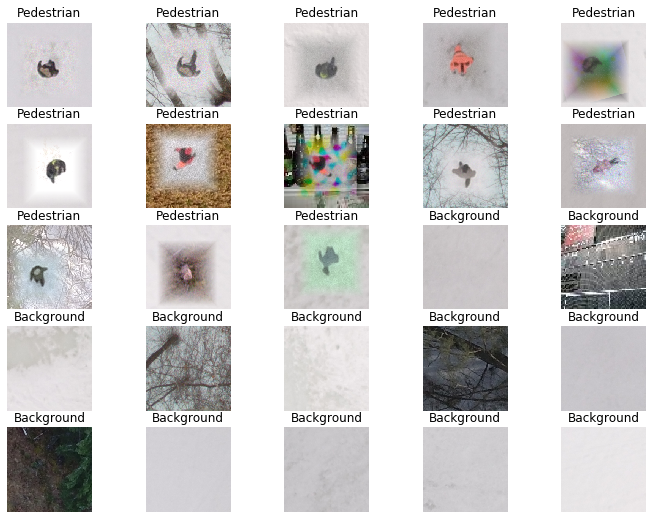

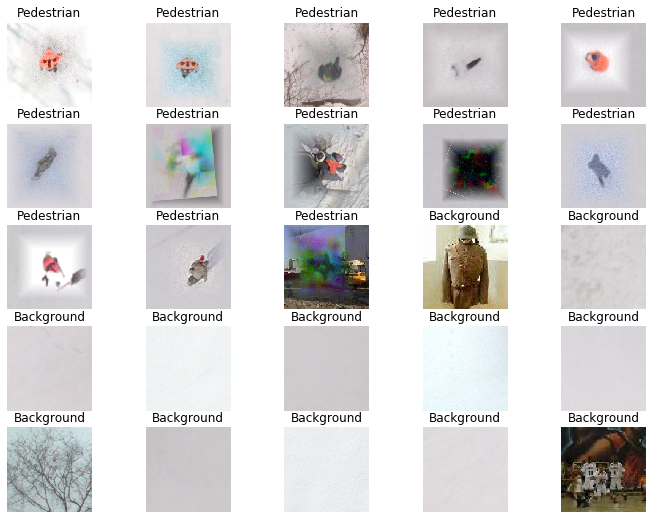

In [32]:
# visualize data
from PIL import Image

pedestrian_train = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Pedestrian/*')
print(f'aug train Pedestrian {len(files)}')

background_train = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Background/*')
print(f'aug train Background {len(files)}')

pedestrian = np.random.choice(pedestrian_train, 13)
background = np.random.choice(background_train, 12)
data = np.concatenate((pedestrian, background))
labels = 13 * ['Pedestrian'] + 12 *['Background']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

pedestrian = np.random.choice(pedestrian_aug_train, 13)
background = np.random.choice(background_train, 12)
data = np.concatenate((pedestrian, background))
labels = 13 * ['Pedestrian'] + 12 *['Background']

N, R, C = 25, 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [1]:
import glob
import numpy as np
import pandas as pd
import os
import shutil 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from data_utils.ImageDataAugmentor import *
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)
import tqdm

from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tqdm import tqdm

TRAIN_DIR = '/files/datasets/lacmus-ds/ladd_crop/ds_aug/train'
VAL_DIR = '/files/datasets/lacmus-ds/ladd_crop/ds_clean/val'
TEST_DIR = '/files/datasets/lacmus-ds/ladd_crop/ds_clean/test'

train_files_pedestrean = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Pedestrian/*')
train_files_pedestrean_aug = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Pedestrian/*')
train_files_pedestrean_aug = list(np.random.choice(train_files_pedestrean_aug, size=4000, replace=False))
train_files_pedestrean = list(train_files_pedestrean + train_files_pedestrean_aug)
print(len(train_files_pedestrean))

train_files_background = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_filtred/train/Background/*')
#train_files_background = list(np.random.choice(train_files_background, size=8000, replace=False))
#train_files_background_aug = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_aug/train/Background/*')
#train_files_background_aug = list(np.random.choice(train_files_pedestrean_aug, size=8000, replace=False))
#train_files_background = list(train_files_background_aug + train_files_background)
print(len(train_files_background))

train_files = list(train_files_pedestrean + train_files_background)
print(len(train_files))

train_files = list(np.random.choice(train_files, size=len(train_files), replace=False))
train_imgs = []
pbar = tqdm(total=len(train_files))
for img in train_files:
    train_imgs.append(img_to_array(load_img(img)))
    pbar.update(len(train_imgs))
pbar.close()
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[7] for fn in train_files]

validation_files_pedestrean = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/val/Pedestrian/*')
validation_files_pedestrean_t = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/test/Pedestrian/*')
validation_files_pedestrean = list(validation_files_pedestrean + validation_files_pedestrean_t)
validation_files_background = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/val/Background/*')
validation_files_background = list(np.random.choice(train_files_background, size=4000, replace=False))
validation_files = list(validation_files_pedestrean + validation_files_background)
print(len(validation_files))

validation_imgs = []
pbar = tqdm(total=len(validation_files))
for img in validation_files:
    validation_imgs.append(img_to_array(load_img(img)))
    pbar.update(len(validation_imgs))
pbar.close()
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[7] for fn in validation_files]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

#train_generator = train_datagen.flow_from_directory(
#    TRAIN_DIR,
#    target_size=(HEIGHT, WIDTH), batch_size=BATCH_SIZE, class_mode='binary')
    
#validation_generator = validation_datagen.flow_from_directory(
#    VAL_DIR,
#    target_size=(HEIGHT, WIDTH),
#    batch_size=BATCH_SIZE,
#    class_mode='binary')

Using TensorFlow backend.
  0%|          | 0/15562 [00:00<?, ?it/s]

6658
8904
15562


121095703it [05:05, 395952.70it/s]                     
  0%|          | 3/5140 [00:00<03:03, 28.00it/s]

5140


13212370it [00:14, 933591.37it/s]                   


['Background', 'Pedestrian', 'Pedestrian', 'Background', 'Pedestrian'] [0 1 1 0 1]
Train dataset shape: (15562, 224, 224, 3) 	Validation dataset shape: (5140, 224, 224, 3)


In [2]:
WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 32
   
TRAIN_AUGMENTATIONS = Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),            
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=0.5)

#train_datagen = ImageDataAugmentor(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
#    preprocess_input=preprocess_input,
#    augment = TRAIN_AUGMENTATIONS)

#train_datagen.fit(train_imgs)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=(0.9, 1.05),
    channel_shift_range=50.0,
    horizontal_flip=True,
    vertical_flip=True,
    
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=BATCH_SIZE)
validation_generator = validation_datagen.flow(validation_imgs, validation_labels_enc, batch_size=32)

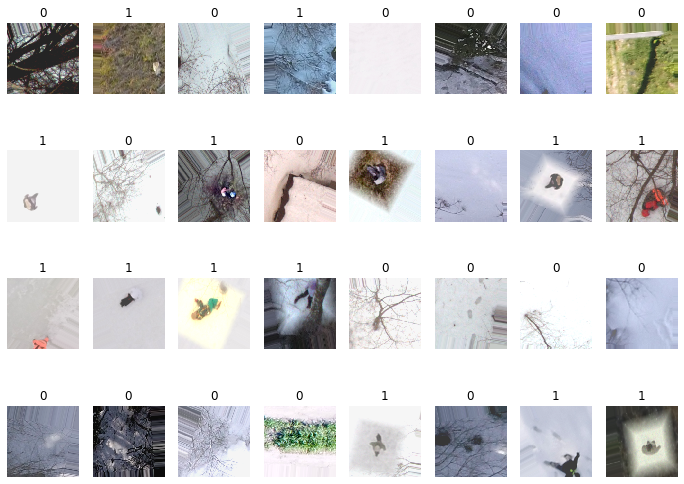

In [3]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 9))
for k, (img, lbl) in enumerate(zip(x_batch, y_batch)):
    plt.subplot(4, 8, k+1)
    plt.title(lbl)
    plt.imshow((img + 1) / 2)
    plt.axis('off')

### Шаг 2. Обучение моделей
#### Resnt50v2 (Keras)

In [4]:
import tensorflow as tf
from keras.models import Model
import keras

WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 32

restnet50 = ResNet50V2(include_top=True, weights='imagenet', input_shape=(HEIGHT,WIDTH,3))

#output = restnet50.layers[-1].output
#output = keras.layers.Flatten()(output)
#restnet50 = Model(restnet50.input, output)

for layer in restnet50.layers:
    layer.trainable = False

restnet50.summary()


Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [5]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = restnet50.output
model = Dense(512, activation='relu')(model)
model = Dense(1, activation='sigmoid')(model)

model = Model(inputs=restnet50.input, outputs=model)

model.load_weights("model.0.98-0.09.h5")

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', f1, keras.metrics.Recall(), keras.metrics.Precision()])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                

In [7]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    mode='min',
    verbose=1)

checkpoint = ModelCheckpoint(
    'model_best_weights_2.h5',
    monitor='loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    period=5)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=1000, 
                              epochs=10,
                              validation_data=validation_generator, 
                              validation_steps=500, 
                              verbose=1,
                              callbacks = [checkpoint])


Epoch 1/10
1000/1000 [==============================] - 344s 344ms/step - loss: 0.1344 - accuracy: 0.9644 - f1: 0.9642 - recall_1: 0.9799 - precision_1: 0.9563 - val_loss: 0.1307 - val_accuracy: 0.9676 - val_f1: 0.9521 - val_recall_1: 0.9615 - val_precision_1: 0.9472
Epoch 2/10
1000/1000 [==============================] - 342s 342ms/step - loss: 0.1181 - accuracy: 0.9677 - f1: 0.9690 - recall_1: 0.9792 - precision_1: 0.9628 - val_loss: 0.0158 - val_accuracy: 0.9672 - val_f1: 0.9525 - val_recall_1: 0.9605 - val_precision_1: 0.9468
Epoch 3/10
1000/1000 [==============================] - 341s 341ms/step - loss: 0.1236 - accuracy: 0.9668 - f1: 0.9680 - recall_1: 0.9779 - precision_1: 0.9623 - val_loss: 0.2436 - val_accuracy: 0.9698 - val_f1: 0.9547 - val_recall_1: 0.9578 - val_precision_1: 0.9560
Epoch 4/10
1000/1000 [==============================] - 342s 342ms/step - loss: 0.1236 - accuracy: 0.9662 - f1: 0.9668 - recall_1: 0.9759 - precision_1: 0.9632 - val_loss: 0.0724 - val_accuracy: 

In [17]:
model.save('model_best_weights.h5')

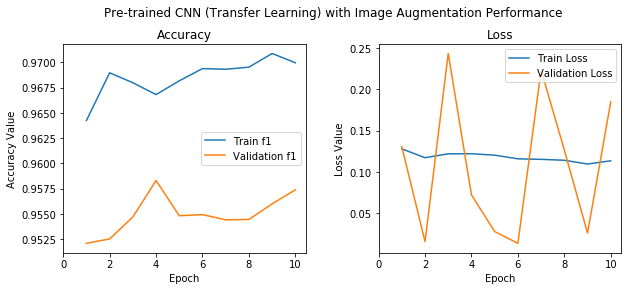

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['f1'], label='Train f1')
ax1.plot(epoch_list, history.history['val_f1'], label='Validation f1')
ax1.set_xticks(np.arange(0, 12, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 12, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [8]:
model.layers[191].trainable = True

#import pandas as pd
#pd.set_option('max_colwidth', -1)

#layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
#pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', f1, keras.metrics.Recall(), keras.metrics.Precision()])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    mode='min',
    verbose=1)

checkpoint = ModelCheckpoint(
    'model2.{f1:.2f}-{val_loss:.2f}.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    period=5)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=1000, 
                              epochs=10,
                              validation_data=validation_generator, 
                              validation_steps=500, 
                              verbose=1,
                              callbacks = [checkpoint])



Epoch 1/10
1000/1000 [==============================] - 345s 345ms/step - loss: 0.1528 - accuracy: 0.9429 - f1: 0.9617 - recall_2: 0.9601 - precision_2: 0.9646 - val_loss: 0.2873 - val_accuracy: 0.8582 - val_f1: 0.8946 - val_recall_2: 0.9755 - val_precision_2: 0.8301
Epoch 2/10
1000/1000 [==============================] - 343s 343ms/step - loss: 0.1255 - accuracy: 0.9548 - f1: 0.9693 - recall_2: 0.9648 - precision_2: 0.9756 - val_loss: 0.2193 - val_accuracy: 0.9129 - val_f1: 0.9321 - val_recall_2: 0.9652 - val_precision_2: 0.9043
Epoch 3/10
1000/1000 [==============================] - 342s 342ms/step - loss: 0.1173 - accuracy: 0.9573 - f1: 0.9713 - recall_2: 0.9664 - precision_2: 0.9774 - val_loss: 0.3974 - val_accuracy: 0.8273 - val_f1: 0.8750 - val_recall_2: 0.9793 - val_precision_2: 0.7946
Epoch 4/10
1000/1000 [==============================] - 343s 343ms/step - loss: 0.1122 - accuracy: 0.9602 - f1: 0.9732 - recall_2: 0.9693 - precision_2: 0.9782 - val_loss: 0.4241 - val_accuracy: 

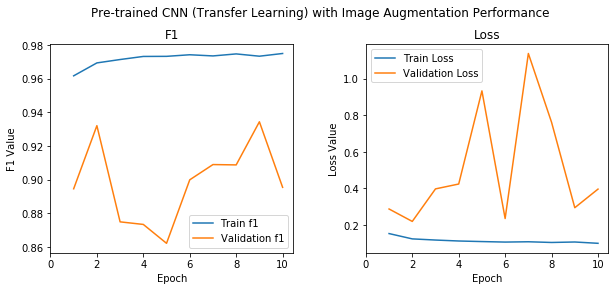

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['f1'], label='Train f1')
ax1.plot(epoch_list, history.history['val_f1'], label='Validation f1')
ax1.set_xticks(np.arange(0, 12, 2))
ax1.set_ylabel('F1 Value')
ax1.set_xlabel('Epoch')
ax1.set_title('F1')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 12, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [8]:
for layer in model.layers:
    layer.trainable = True

#import pandas as pd
#pd.set_option('max_colwidth', -1)

#layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
#pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy', f1, keras.metrics.Recall(), keras.metrics.Precision()])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    mode='min',
    verbose=1)

checkpoint = ModelCheckpoint(
    'model3.{f1:.2f}-{val_loss:.2f}.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    period=5)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=1000, 
                              epochs=10,
                              validation_data=validation_generator, 
                              validation_steps=500, 
                              verbose=1,
                              callbacks = [checkpoint])



Epoch 1/10
1000/1000 [==============================] - 349s 349ms/step - loss: 0.3302 - accuracy: 0.8683 - f1: 0.8372 - recall_2: 0.8163 - precision_2: 0.8678 - val_loss: 0.1850 - val_accuracy: 0.9058 - val_f1: 0.7349 - val_recall_2: 0.6614 - val_precision_2: 0.8848
Epoch 2/10
1000/1000 [==============================] - 343s 343ms/step - loss: 0.2819 - accuracy: 0.8903 - f1: 0.8666 - recall_2: 0.8483 - precision_2: 0.8910 - val_loss: 0.3081 - val_accuracy: 0.8951 - val_f1: 0.7627 - val_recall_2: 0.8168 - val_precision_2: 0.7378
Epoch 3/10
1000/1000 [==============================] - 344s 344ms/step - loss: 0.2195 - accuracy: 0.9181 - f1: 0.8987 - recall_2: 0.8785 - precision_2: 0.9256 - val_loss: 0.2779 - val_accuracy: 0.9365 - val_f1: 0.8402 - val_recall_2: 0.8100 - val_precision_2: 0.8932
Epoch 4/10
1000/1000 [==============================] - 345s 345ms/step - loss: 0.1823 - accuracy: 0.9339 - f1: 0.9185 - recall_2: 0.9015 - precision_2: 0.9415 - val_loss: 0.1848 - val_accuracy: 

In [10]:
model.save('model4_best_weights.h5')

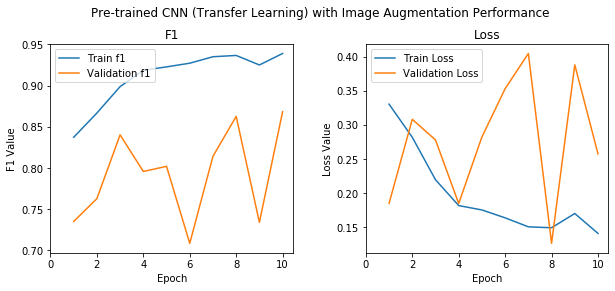

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['f1'], label='Train f1')
ax1.plot(epoch_list, history.history['val_f1'], label='Validation f1')
ax1.set_xticks(np.arange(0, 12, 2))
ax1.set_ylabel('F1 Value')
ax1.set_xlabel('Epoch')
ax1.set_title('F1')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 12, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
from data_utils.dataset import Annotation, Rectangle, LaddDataset, ImageIdType
import os
import cv2
from typing import Optional, List, Callable
import matplotlib.pyplot as plt

class ImageCropper:
    """Режет изображение на фрагменты, по сетке

    window_w и window_h - размеры итоговых изображений
    overlap_w и overlap_h - нахлест изображений при формировании сетки
    """

    def __init__(self,
                 window_w: int, window_h: int,
                 overlap_w: int, overlap_h: int) -> None:
        self.window_w = window_w
        self.window_h = window_h
        self.overlap_w = overlap_w
        self.overlap_h = overlap_h

    def crop_image(self, image_path: str) -> list:
        """Разбивает изображений из файла на фрагменты"""
        img = cv2.imread(image_path)
        image_h, image_w, _channels = img.shape
        rects = self._image_grid(
            image_w=image_w, image_h=image_h,
            window_w=self.window_w, window_h=self.window_h,
            overlap_w=self.overlap_w, overlap_h=self.overlap_h,
        )
        return [img[r.ymin:r.ymax, r.xmin:r.xmax] for r in rects]

    @classmethod
    def _image_grid(cls,
                    image_w: int, image_h: int,
                    window_w: int, window_h: int,
                    overlap_w: int, overlap_h: int) -> List[Rectangle]:
        """Рассчитывает координаты прямоугольников для разбиения изображения на блоки

        :param image_w: ширина изображения
        :param image_h: высота изображения
        :param window_w: ширина прямоугольника
        :param window_h: высота прямоугольника
        :param overlap_w: перекрытие прямоугольников по горизонтали
        :param overlap_h: перекрытие прямоугольников по вертикали
        """
        rectangles = []

        # комбинируем вертикальный и горизонтальные разрезы, чтобы получить прямоугольники
        for xmin in cls._cut_points(image=image_w, window=window_w, overlap=overlap_w):
            for ymin in cls._cut_points(image=image_h, window=window_h, overlap=overlap_h):
                rect = Rectangle(xmin=xmin, ymin=ymin, xmax=xmin + window_w, ymax=ymin + window_h)
                rectangles.append(rect)

        # избавляемся от повторов
        return list(set(rectangles))

    @classmethod
    def _cut_points(cls, image: int, window: int, overlap: int) -> List[int]:
        """Точки разрезов изображения (направляющие)"""
        points = []
        offset = window - overlap
        for v in range(0, image - window, offset):
            points.append(v)
        # справа и снизу остается неполный прямоугольник
        # добавим его, отсутпив справа ширину окна и сделаем еще один разрез
        points.append(image - window)
        return points

cropper = ImageCropper(window_w=224, window_h=224,
                 overlap_w=112, overlap_h=112)

crops = cropper.crop_image('/files/datasets/lacmus-ds/ladd/summer/JPEGImages/460.jpg')
#plt.imshow(crops[2])
print(len(crops))
crops[0].shape

1296


(224, 224, 3)

In [14]:
import tensorflow as tf
from keras.models import Model
import keras as keras
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np

WIDTH = 224
HEIGHT = 224
BATCH_SIZE = 32

#restnet50 = ResNet50V2(include_top=True, weights='imagenet', input_shape=(HEIGHT,WIDTH,3))
restnet50 = ResNet50V2(include_top=True, weights='imagenet')
#restnet50.compile()

model = restnet50.output
model = Dense(512, activation='relu')(model)
model = Dense(1, activation='softplus')(model)

model = Model(inputs=restnet50.input, outputs=model)

model.load_weights("model4_best_weights.h5")

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

results = []    
for crop in crops:
    x = img_to_array(crop)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    if preds[0][0] > 0.5:
        #print(preds[0][0])
        results.append(crop)
        
print(len(results))

87


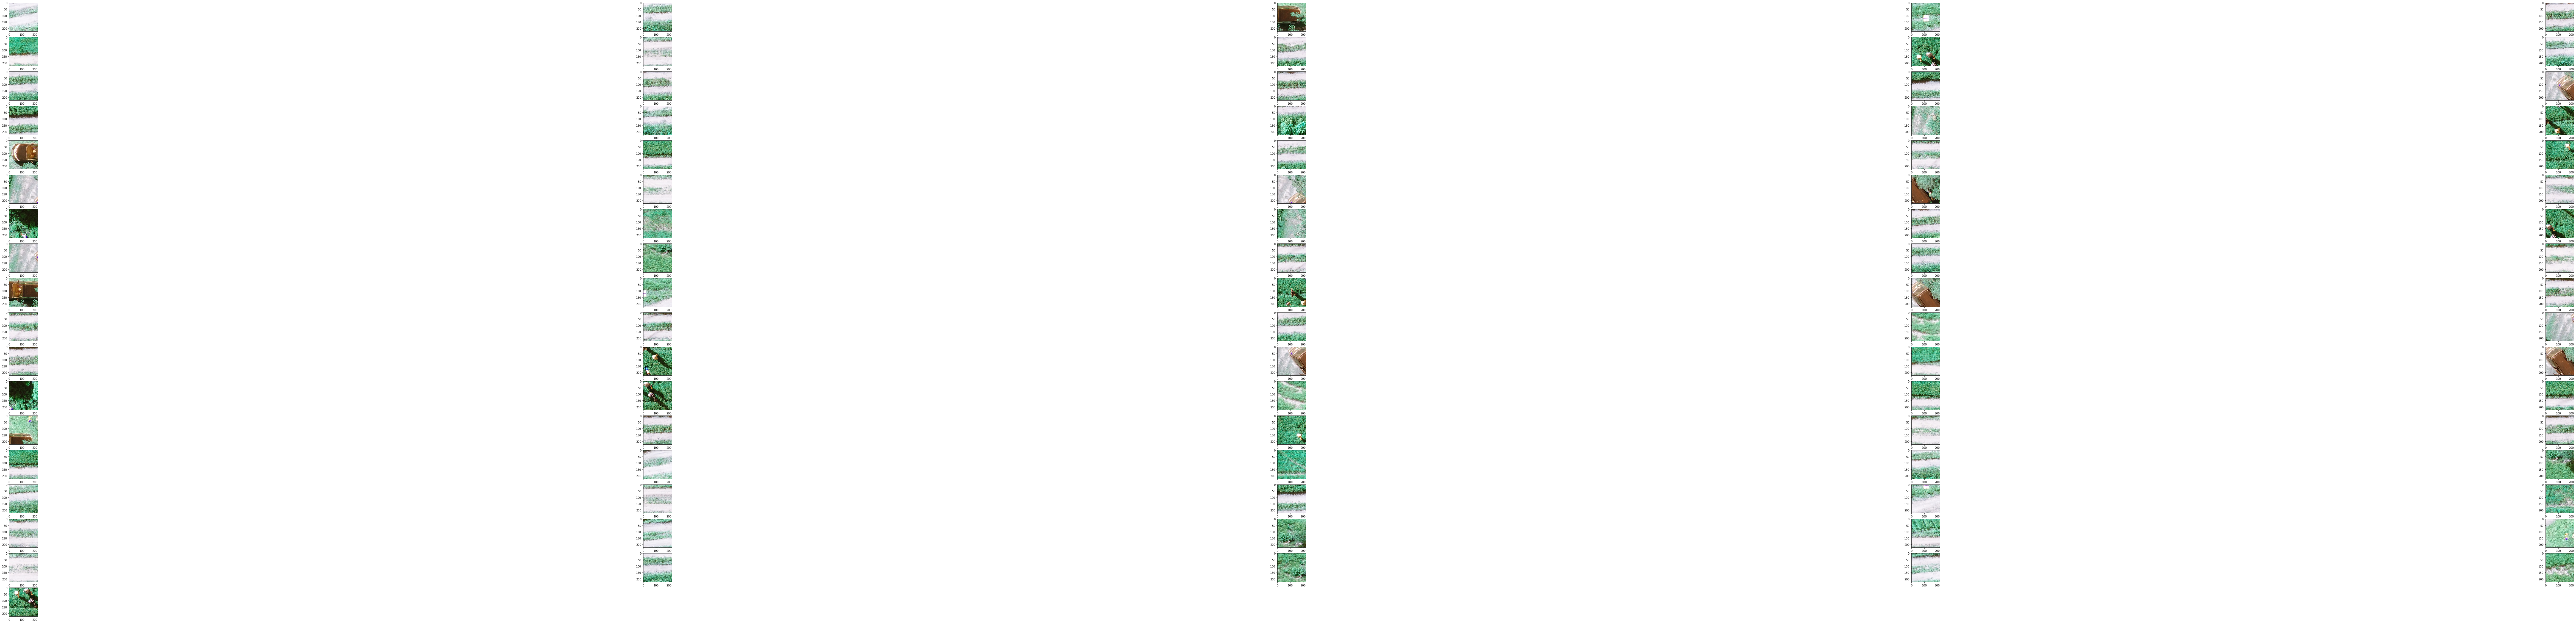

In [15]:
def plot_figures(figures, nrows = 5, ncols=5):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """
    fig=plt.figure(figsize=(200, 200))
    columns = ncols
    rows = nrows
    for i in range(1, len(figures)):
        img = figures[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    
plot_figures(results, nrows=len(results))

#too many false posetivs

In [17]:
# filter crops
import glob
import numpy as np
import pandas as pd
import os
import shutil
from tqdm import tqdm

filter_dir = '/files/datasets/lacmus-ds/ladd_crop/ds_filtred/train/Background'
ds_dir = '/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Background/*'

files = glob.glob('/files/datasets/lacmus-ds/ladd_crop/ds_clean/train/Background/*')
pbar = tqdm(total=len(files))
cnt = 0            

for file in files:
    crops = cropper.crop_image(file)
    for crop in crops:
        x = img_to_array(crop)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds = model.predict(x)
        if preds[0][0] > 0.5:
            shutil.copyfile(file, os.path.join(filter_dir, os.path.basename(file)))
            break
    cnt = cnt + 1
    pbar.update(cnt)
pbar.close()

22159861503it [2:44:49, 2240687.94it/s]                   


#### Resnet34 (Keras)

In [ ]:
# pyhon code here

### Resnet50 (https://github.com/qubvel/classification_models)

In [ ]:
# pyhon code here